In [1]:
pip install factor_analyzer

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#https://mathpretty.com/10994.html
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 初始化数据集
df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
df['label'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(40197.869992319254, 0.0)

In [4]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
print(kmo_model)

0.843143228524355


In [5]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(25, rotation=None)
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()

In [6]:
var=fa.get_factor_variance()
var

(array([1.39051030e+01, 5.71334069e+00, 2.83527245e+00, 1.97238441e+00,
        1.64395263e+00, 1.18430224e+00, 6.74511006e-01, 4.69544582e-01,
        4.07962567e-01, 3.40247195e-01, 2.84605669e-01, 2.57785751e-01,
        2.45596334e-01, 1.71281694e-01, 1.19430143e-01, 7.13433398e-02,
        6.79005440e-02, 4.38859346e-02, 4.03248865e-02, 3.29326220e-02,
        2.23330693e-02, 1.79447099e-02, 1.66419011e-02, 9.72461028e-03,
        8.51953519e-03]),
 array([4.48551710e-01, 1.84301313e-01, 9.14604016e-02, 6.36253036e-02,
        5.30307300e-02, 3.82032980e-02, 2.17584195e-02, 1.51465994e-02,
        1.31600828e-02, 1.09757160e-02, 9.18082802e-03, 8.31566940e-03,
        7.92246237e-03, 5.52521592e-03, 3.85258527e-03, 2.30139806e-03,
        2.19034013e-03, 1.41567531e-03, 1.30080279e-03, 1.06234265e-03,
        7.20421591e-04, 5.78861611e-04, 5.36835519e-04, 3.13697106e-04,
        2.74823716e-04]),
 array([0.44855171, 0.63285302, 0.72431342, 0.78793873, 0.84096946,
        0.879172

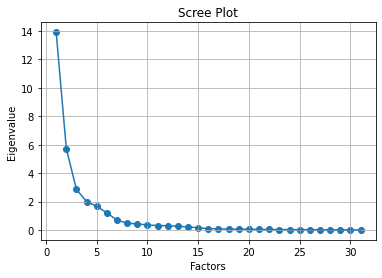

In [7]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


In [8]:
fa = FactorAnalyzer(5, rotation="varimax")
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=5, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

Text(87.0, 0.5, 'Sepal Width')

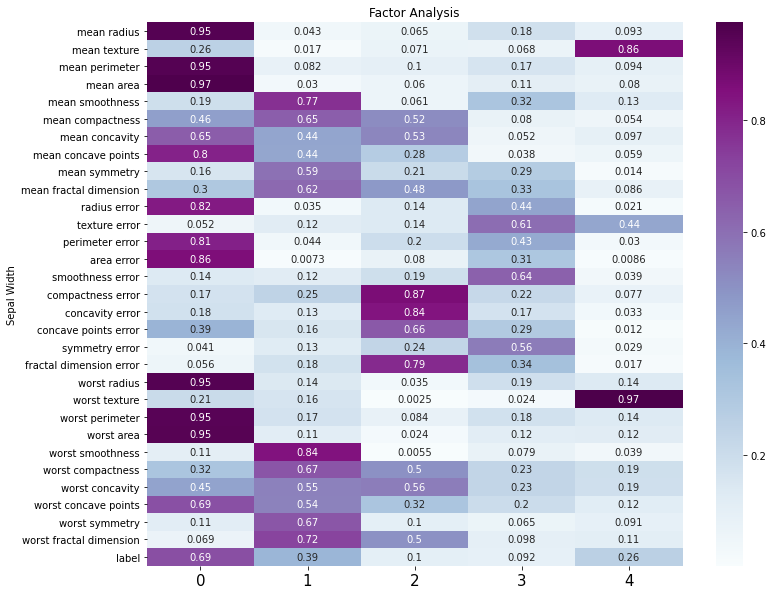

In [9]:
import seaborn as sns
df_cm = pd.DataFrame(np.abs(fa.loadings_),index=df.columns)

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_cm,annot=True,cmap='BuPu',ax=ax)
# 设置y轴字体的大小
ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis",fontsize=12)
ax.set_ylabel("Sepal Width")

In [10]:
pd.DataFrame(fa.transform(df))

,0,1,2,3,4
0,1.687316,2.478504,0.855849,0.387163,-2.391800
1,1.569012,-0.599862,-0.291034,-1.307802,-0.654918
2,1.526888,0.571168,0.374887,0.136043,-0.731000
3,-0.778202,4.622245,1.528159,1.235574,-1.146076
4,1.887111,-0.459718,0.259878,0.187402,-1.631009
...,...,...,...,...,...
564,2.600143,-0.945141,0.284917,1.458287,-0.380462
565,1.656115,-0.935928,-0.358334,0.693694,1.704550
566,0.407021,-0.940068,0.675975,-0.751976,1.546369
567,1.558354,2.354420,1.183856,-1.355649,1.773969


# 進行調整

In [11]:
#拿掉mean compactness
df1 = df.drop(columns = ['mean compactness'])
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.3001,0.14710,0.2419,0.07871,1.0950,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.0869,0.07017,0.1812,0.05667,0.5435,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.1974,0.12790,0.2069,0.05999,0.7456,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.2414,0.10520,0.2597,0.09744,0.4956,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.1980,0.10430,0.1809,0.05883,0.7572,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
chi_square_value,p_value=calculate_bartlett_sphericity(df1)
chi_square_value, p_value

(38025.42025871164, 0.0)

In [13]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df1)
print(kmo_model)

0.8325476058293274


In [14]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(25, rotation=None)
fa.fit(df1)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()

In [15]:
ev

array([1.31922460e+01, 5.57239684e+00, 2.83296252e+00, 1.99487839e+00,
       1.65857644e+00, 1.20729892e+00, 6.83309035e-01, 4.74806595e-01,
       4.06846513e-01, 3.50786237e-01, 2.96333328e-01, 2.72156128e-01,
       2.49149742e-01, 2.03921694e-01, 1.48571028e-01, 8.48043926e-02,
       7.63011646e-02, 5.90331656e-02, 5.11940260e-02, 4.47816879e-02,
       3.01082778e-02, 2.73724696e-02, 2.44361602e-02, 2.10263493e-02,
       1.74034093e-02, 9.73707051e-03, 6.99858209e-03, 1.58966769e-03,
       7.86773243e-04, 1.87385457e-04])

In [16]:
var=fa.get_factor_variance()
var

(array([1.31799981e+01, 5.55756410e+00, 2.81444814e+00, 1.96566961e+00,
        1.64097846e+00, 1.18335278e+00, 6.71935087e-01, 4.50198100e-01,
        3.91254529e-01, 3.31019766e-01, 2.69532791e-01, 2.39626439e-01,
        2.24175434e-01, 1.73472742e-01, 1.22084295e-01, 6.98949824e-02,
        6.19513336e-02, 4.39870075e-02, 3.75062110e-02, 3.04865419e-02,
        1.77559792e-02, 1.69032942e-02, 1.41637284e-02, 9.20762275e-03,
        4.56235969e-03]),
 array([4.39333269e-01, 1.85252137e-01, 9.38149381e-02, 6.55223202e-02,
        5.46992821e-02, 3.94450927e-02, 2.23978362e-02, 1.50066033e-02,
        1.30418176e-02, 1.10339922e-02, 8.98442637e-03, 7.98754796e-03,
        7.47251448e-03, 5.78242475e-03, 4.06947651e-03, 2.32983275e-03,
        2.06504445e-03, 1.46623358e-03, 1.25020703e-03, 1.01621806e-03,
        5.91865973e-04, 5.63443140e-04, 4.72124282e-04, 3.06920758e-04,
        1.52078656e-04]),
 array([0.43933327, 0.62458541, 0.71840034, 0.78392266, 0.83862195,
        0.878067

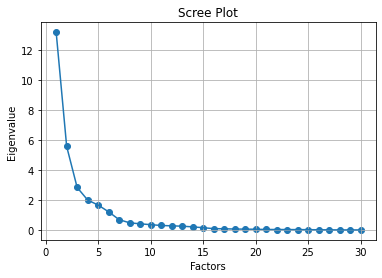

In [17]:
plt.scatter(range(1,df1.shape[1]+1),ev)
plt.plot(range(1,df1.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [18]:
fa = FactorAnalyzer(5, rotation="varimax")
fa.fit(df1)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=5, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

Text(87.0, 0.5, 'Sepal Width')

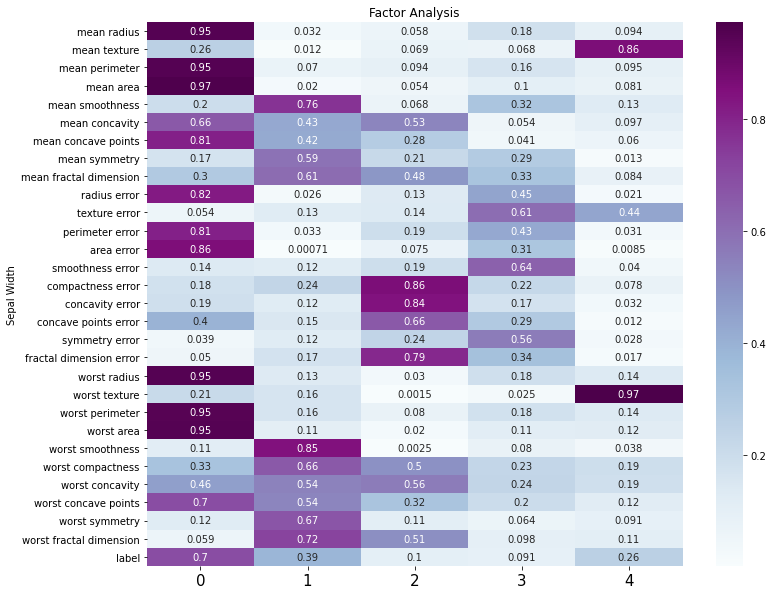

In [19]:
import seaborn as sns
df_cm = pd.DataFrame(np.abs(fa.loadings_),index=df1.columns)

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_cm,annot=True,cmap='BuPu',ax=ax)
# 设置y轴字体的大小
ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis",fontsize=12)
ax.set_ylabel("Sepal Width")

In [20]:
#拿掉mean concavity
df2 = df.drop(columns = ['mean concavity'])
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,1.0950,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.5435,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7456,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,0.4956,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7572,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [21]:
chi_square_value,p_value=calculate_bartlett_sphericity(df2)
chi_square_value, p_value

(37845.908608512385, 0.0)

In [22]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df2)
print(kmo_model)

0.8289568708929512


In [23]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(25, rotation=None)
fa.fit(df2)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()

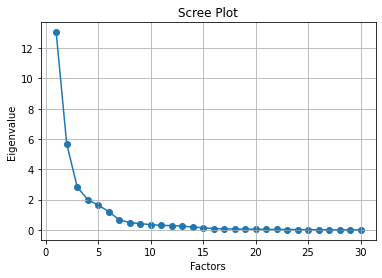

In [24]:
plt.scatter(range(1,df2.shape[1]+1),ev)
plt.plot(range(1,df2.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [25]:
fa = FactorAnalyzer(5, rotation="varimax")
fa.fit(df2)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=5, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

Text(87.0, 0.5, 'Sepal Width')

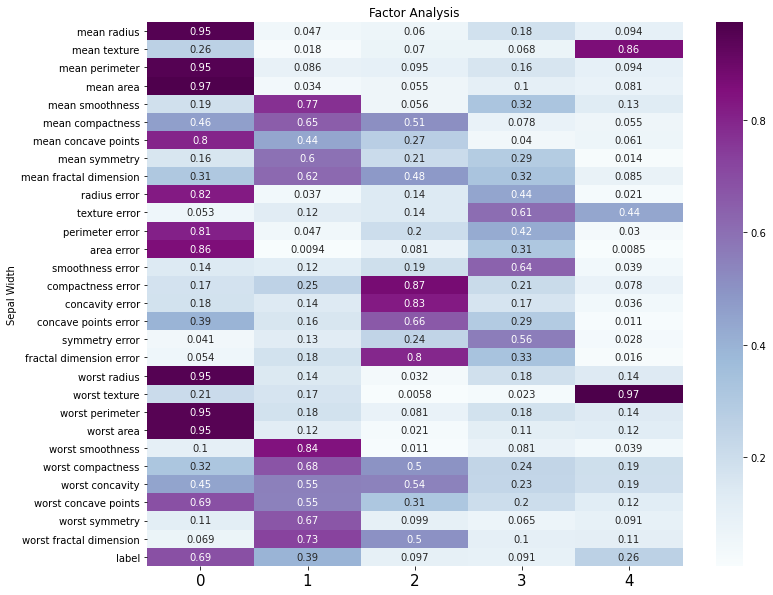

In [26]:
import seaborn as sns
df_cm = pd.DataFrame(np.abs(fa.loadings_),index=df2.columns)

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_cm,annot=True,cmap='BuPu',ax=ax)
# 设置y轴字体的大小
ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis",fontsize=12)
ax.set_ylabel("Sepal Width")

In [27]:
#拿掉mean concavity, mean concave points
df3 = df.drop(columns = ['mean concavity','mean concave points'])
df3.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [28]:
chi_square_value,p_value=calculate_bartlett_sphericity(df3)
chi_square_value, p_value

(35943.75307359801, 0.0)

In [29]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df3)
print(kmo_model)

0.8130097623237164


In [30]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(25, rotation=None)
fa.fit(df3)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()

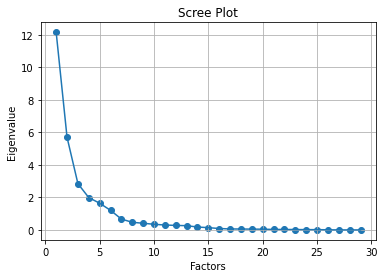

In [31]:
plt.scatter(range(1,df3.shape[1]+1),ev)
plt.plot(range(1,df3.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [32]:
fa = FactorAnalyzer(5, rotation="varimax")
fa.fit(df3)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=5, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [33]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(25, rotation=None)
fa.fit(df3)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()

Text(87.0, 0.5, 'Sepal Width')

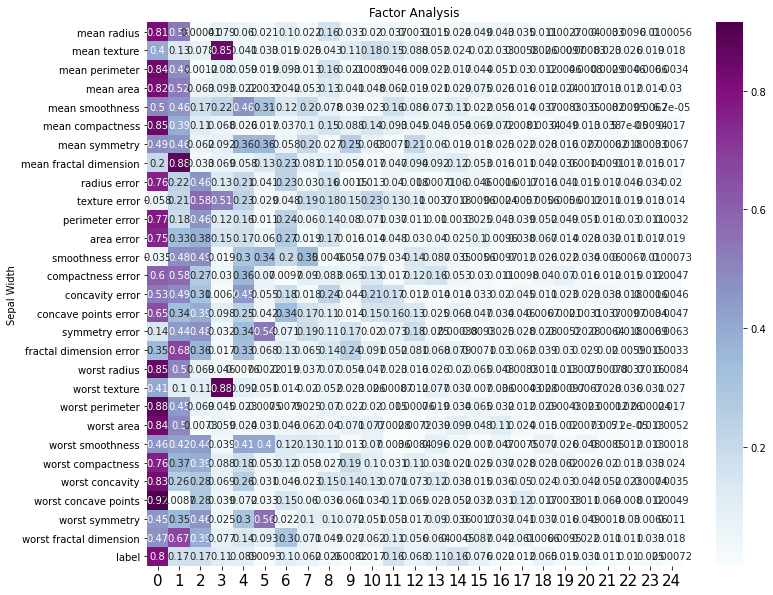

In [34]:
import seaborn as sns
df_cm = pd.DataFrame(np.abs(fa.loadings_),index=df3.columns)

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_cm,annot=True,cmap='BuPu',ax=ax)
# 设置y轴字体的大小
ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis",fontsize=12)
ax.set_ylabel("Sepal Width")

In [35]:
#拿掉mean concavity, mean concave points, mean fractal dimension
df4 = df.drop(columns = ['mean concavity','mean concave points','mean fractal dimension'])
df4.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean symmetry,radius error,texture error,perimeter error,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.2419,1.0950,0.9053,8.589,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.1812,0.5435,0.7339,3.398,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.2069,0.7456,0.7869,4.585,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2597,0.4956,1.1560,3.445,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1809,0.7572,0.7813,5.438,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [36]:
chi_square_value,p_value=calculate_bartlett_sphericity(df4)
chi_square_value, p_value

(34428.65062175385, 0.0)

In [37]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df4)
print(kmo_model)

0.8057419424533987


In [38]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(25, rotation=None)
fa.fit(df4)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()

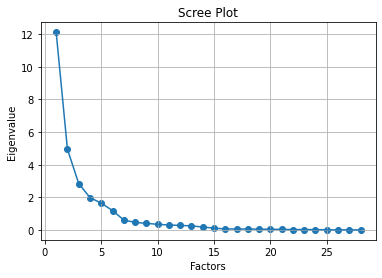

In [39]:
plt.scatter(range(1,df4.shape[1]+1),ev)
plt.plot(range(1,df4.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [40]:
fa = FactorAnalyzer(5, rotation="varimax")
fa.fit(df4)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=5, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

Text(87.0, 0.5, 'Sepal Width')

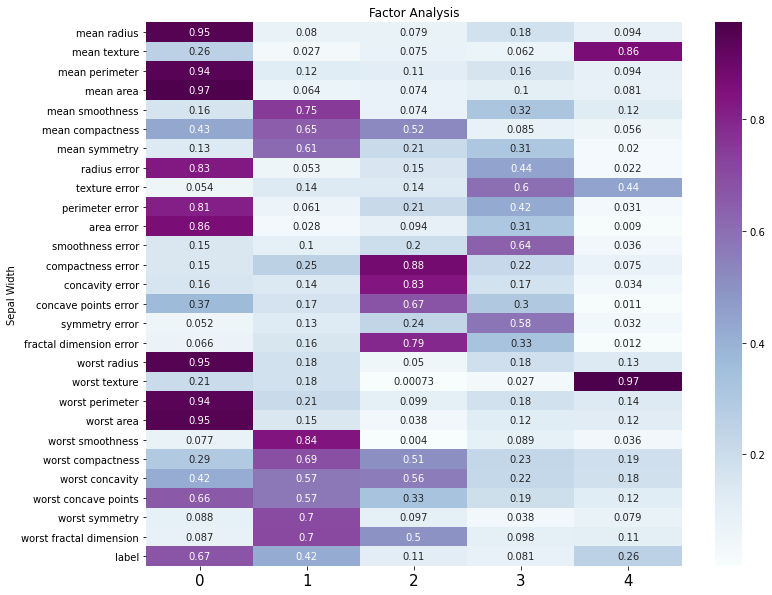

In [41]:
import seaborn as sns
df_cm = pd.DataFrame(np.abs(fa.loadings_),index=df4.columns)

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_cm,annot=True,cmap='BuPu',ax=ax)
# 设置y轴字体的大小
ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis",fontsize=12)
ax.set_ylabel("Sepal Width")

In [42]:
#拿掉mean concavity, mean concave points, mean fractal dimension,mean compactness
df5 = df.drop(columns = ['mean concavity','mean concave points','mean fractal dimension','mean compactness'])
df5.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean symmetry,radius error,texture error,perimeter error,area error,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.2419,1.0950,0.9053,8.589,153.40,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.1812,0.5435,0.7339,3.398,74.08,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.2069,0.7456,0.7869,4.585,94.03,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.2597,0.4956,1.1560,3.445,27.23,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.1809,0.7572,0.7813,5.438,94.44,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [43]:
chi_square_value,p_value=calculate_bartlett_sphericity(df5)
chi_square_value, p_value

(32446.986946214514, 0.0)

In [44]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df5)
print(kmo_model)

0.796738202482406


In [45]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(25, rotation=None)
fa.fit(df5)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()

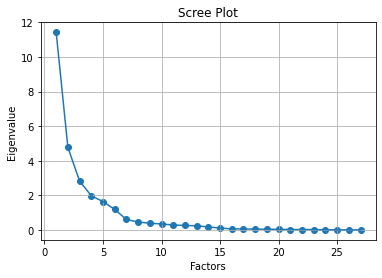

In [46]:
plt.scatter(range(1,df5.shape[1]+1),ev)
plt.plot(range(1,df5.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [47]:
fa = FactorAnalyzer(5, rotation="varimax")
fa.fit(df5)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=5, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

Text(87.0, 0.5, 'Sepal Width')

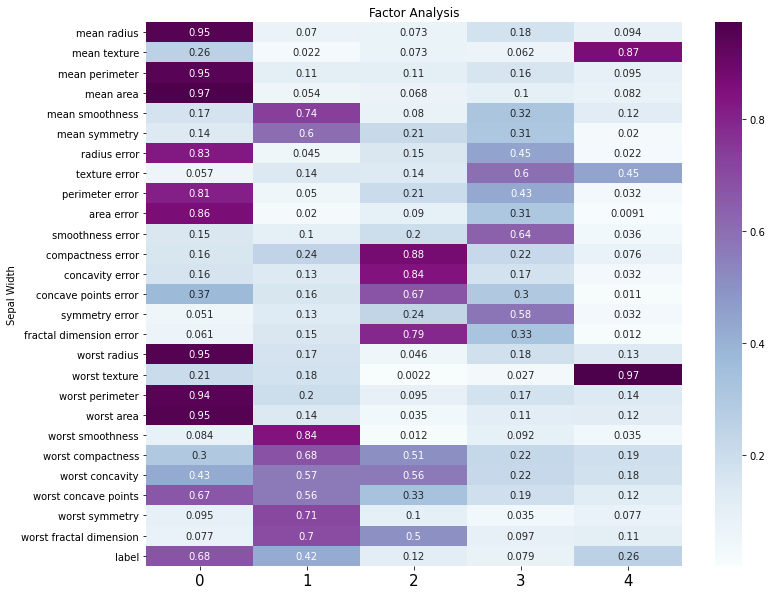

In [48]:
import seaborn as sns
df_cm = pd.DataFrame(np.abs(fa.loadings_),index=df5.columns)

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_cm,annot=True,cmap='BuPu',ax=ax)
# 设置y轴字体的大小
ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis",fontsize=12)
ax.set_ylabel("Sepal Width")

In [69]:
#拿掉mean concavity, mean concave points, mean fractal dimension,mean compactness,worst compactness,worst concavity
df6 = df.drop(columns = ['mean concavity','mean concave points','mean fractal dimension','mean compactness','worst compactness','worst concavity'])
df6.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean symmetry,radius error,texture error,perimeter error,area error,...,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.2419,1.0950,0.9053,8.589,153.40,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.1812,0.5435,0.7339,3.398,74.08,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.2069,0.7456,0.7869,4.585,94.03,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.2597,0.4956,1.1560,3.445,27.23,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.1809,0.7572,0.7813,5.438,94.44,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.1625,0.2364,0.07678,0


In [70]:
chi_square_value,p_value=calculate_bartlett_sphericity(df6)
chi_square_value, p_value

(29018.750906800396, 0.0)

In [71]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df6)
print(kmo_model)

0.7865541283032453


In [72]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(25, rotation=None)
fa.fit(df6)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()

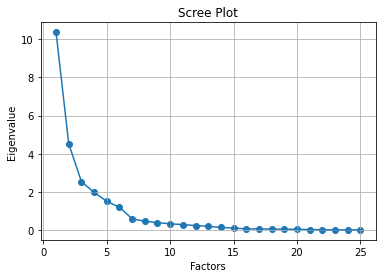

In [73]:
plt.scatter(range(1,df6.shape[1]+1),ev)
plt.plot(range(1,df6.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [74]:
fa = FactorAnalyzer(5, rotation="varimax")
fa.fit(df6)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=5, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

Text(87.0, 0.5, 'Sepal Width')

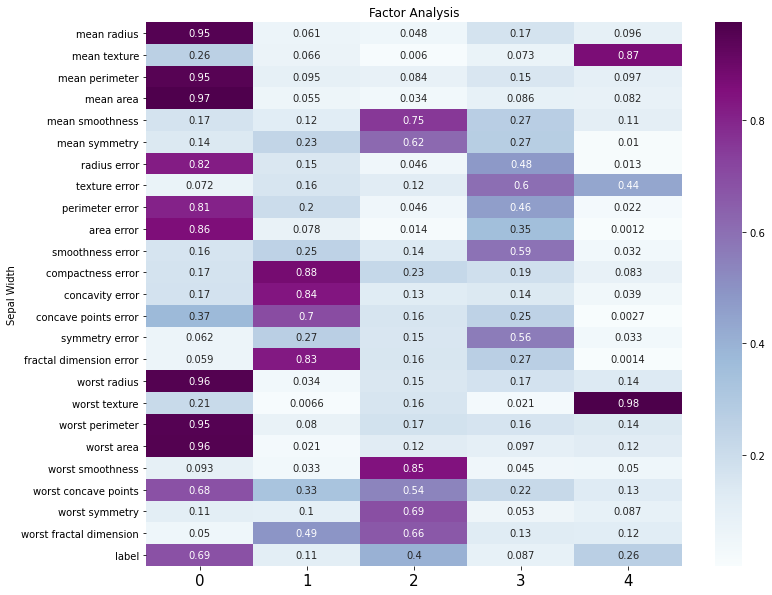

In [75]:
import seaborn as sns
df_cm = pd.DataFrame(np.abs(fa.loadings_),index=df6.columns)

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_cm,annot=True,cmap='BuPu',ax=ax)
# 设置y轴字体的大小
ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis",fontsize=12)
ax.set_ylabel("Sepal Width")

In [68]:
pd.DataFrame(fa.transform(df6))

,0,1,2,3,4
0,1.847388,2.198590,0.741957,0.279406,-2.456499
1,1.647085,-0.347166,-0.425087,-1.363608,-0.596965
2,1.433379,0.691710,0.474183,0.187444,-0.780837
3,-0.655001,4.524768,1.238335,1.243030,-1.259015
4,1.792843,-0.334941,0.287508,0.173507,-1.572638
...,...,...,...,...,...
564,2.471770,-0.620149,0.170647,1.370215,-0.418012
565,1.632812,-0.941098,-0.260664,0.484602,1.755066
566,0.405833,-1.007361,0.751295,-0.642258,1.540449
567,1.710048,1.904540,1.180196,-1.238873,1.613903
